<a href="https://colab.research.google.com/github/hatimchachuliya/black-friday-sales-analysis/blob/master/black_friday_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
print("ok")

Populating the interactive namespace from numpy and matplotlib
ok


In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
df_train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('ISO-8859-1')))
print(df_train.head())

   User_ID Product_ID  ... Product_Category_2 Product_Category_3
0  1000004  P00128942  ...               11.0                NaN
1  1000009  P00113442  ...                5.0                NaN
2  1000010  P00288442  ...               14.0                NaN
3  1000010  P00145342  ...                9.0                NaN
4  1000011  P00053842  ...                5.0               12.0

[5 rows x 11 columns]


In [0]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [0]:
df_train[['User_ID','Product_ID', 'Product_Category_1','Product_Category_2', 'Product_Category_3']].head(10)

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,11.0,NaN
1,1000009,P00113442,3,5.0,NaN
2,1000010,P00288442,5,14.0,NaN
3,1000010,P00145342,4,9.0,NaN
4,1000011,P00053842,4,5.0,12.0
5,1000013,P00350442,2,3.0,15.0
6,1000013,P00155442,1,11.0,15.0
7,1000013,P0094542,2,4.0,9.0
8,1000015,P00161842,10,13.0,16.0
9,1000022,P00067942,5,14.0,NaN


In [0]:
df_train.shape

(233599, 11)

In [0]:
df_train['Product_Category_3'].count()

71037

In [0]:
df_train_copy=df_train

In [0]:
#checking for the mising values
all_data_na = (df_train_copy.isnull().sum() / len(df_train_copy)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
Product_Category_3,69.590195
Product_Category_2,30.969311


In [0]:
#filling the missing data in Product_Category_2 and Product_Category_3 as 0 , considering the Product_ID as the user's Transaction id...
df_train_copy['Product_Category_2']=df_train_copy['Product_Category_2'].fillna(0)
df_train_copy['Product_Category_3']=df_train_copy['Product_Category_3'].fillna(0)

In [0]:
df_train_copy.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,0.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,0.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,0.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,0.0


In [0]:
#final check for the mising values
all_data_na = (df_train_copy.isnull().sum() / len(df_train_copy)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [0]:
cols=['Product_Category_1'  ,'Product_Category_2' ,'Product_Category_3']

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Distribution charts between different Age_Groups and Products')

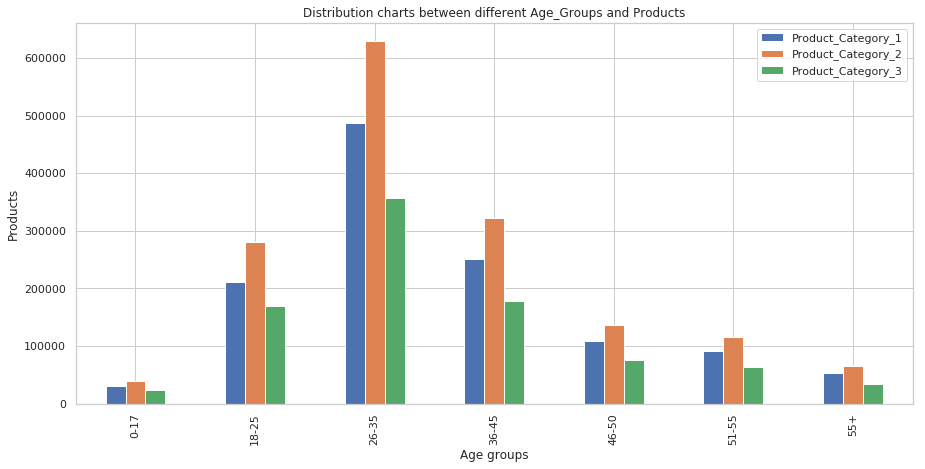

In [0]:
#GROUPING THE DATA BASED ON THE User_ID and Age

fig, ax = plt.subplots(figsize=(15,7))

data_by_uid_age=df_train.groupby(['Age'])['Product_Category_1','Product_Category_2','Product_Category_3'].sum().plot(ax=ax, kind='bar')
print(data_by_uid_age)
ax.set_xlabel('Age groups')
ax.set_ylabel('Products')
ax.set_title('Distribution charts between different Age_Groups and Products')

# for name,group in data:
#   print(name)
#   print(group)

**The above bar graph proves that Product_Category_2 has the highest sale in Age_group of 26-30, Also both the product category Product_Category_1 and Product_Category_3  has the highest selling in the Age_group of 26-30**

AxesSubplot(0.125,0.125;0.775x0.755)


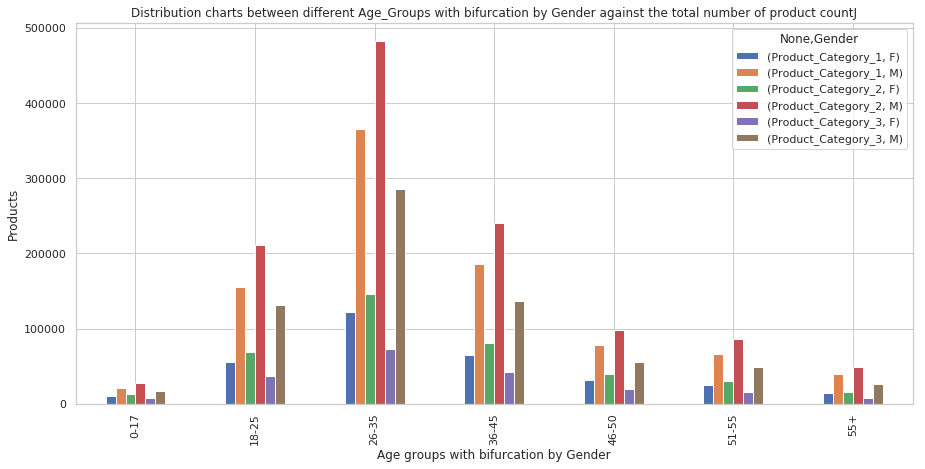

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
data_by_age=df_train.groupby(['Age','Gender'])['Product_Category_1','Product_Category_2','Product_Category_3'].sum().unstack().plot(ax=ax , kind='bar')
ax.set_xlabel('Age groups with bifurcation by Gender')
ax.set_ylabel('Products')
ax.set_title('Distribution charts between different Age_Groups with bifurcation by Gender against the total number of product countJ')

print(data_by_age)

**The above graphs concludes  that Product_Category_2 was purchased by MEN**

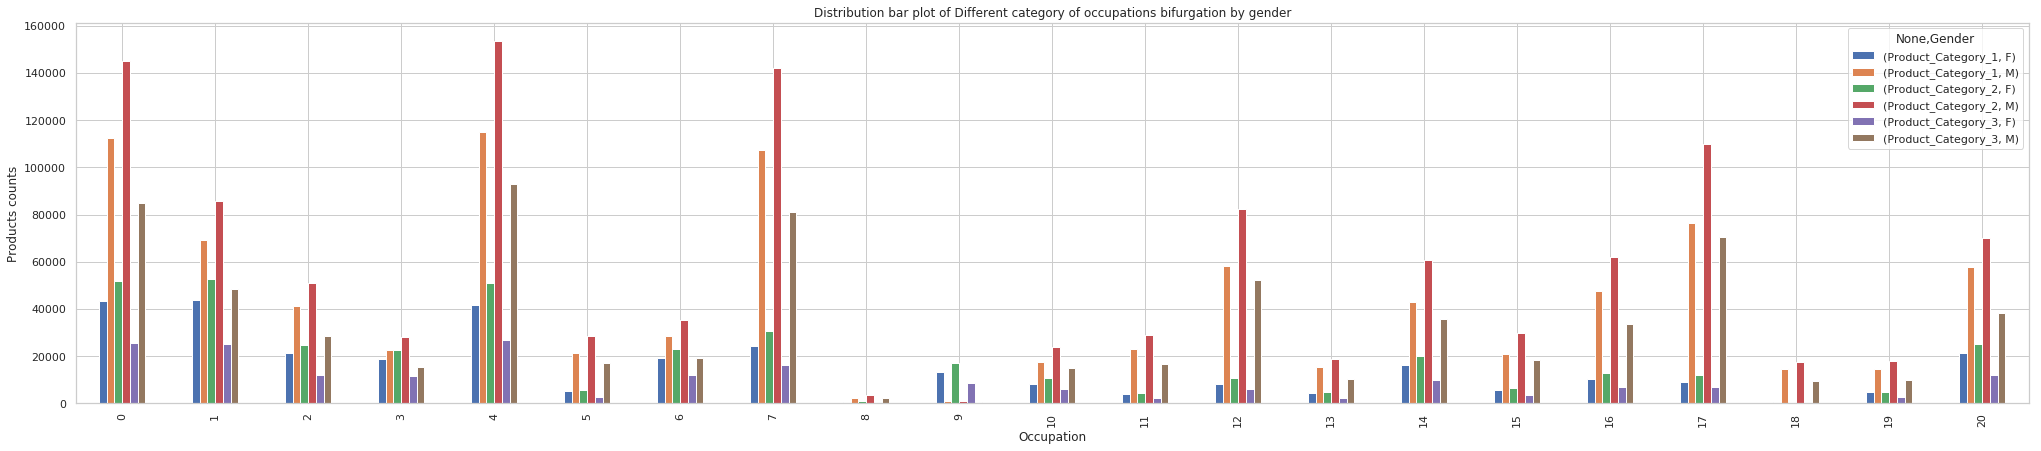

In [0]:
fig, ax = plt.subplots(figsize=(35,7))
ax.set_xlabel('Different category of occupations bifurgation by gender')
ax.set_ylabel('Products counts')
ax.set_title('Distribution bar plot of Different category of occupations bifurgation by gender')
data_by_occupation=df_train_copy.groupby(['Occupation','Gender'])['Product_Category_1','Product_Category_2','Product_Category_3'].sum().unstack().plot(ax=ax, kind='bar')

**Inference by above plots**

1.   Males from job category_4 has purchased the highest number of products from Product_Category_2, followed by Occupation_7 and Occupation_0

2.   Females from job category_4 has purchased the highest number of products from Product_Category_2, followed by Occupation_7 and Occupation_0


3.   Occupation for Category_8 has the lowest selling of all the products amnong all the different job category
4.   From Occupation category_9 products were bought by only females 



5.   From Occupation category_18 products were bought by only males




